# Homework 2 Solution

1. Bootstrap
2. Estimation and Confidence Intervals

## Task 1

Bootstrap replicates of other statistics

The mean is just one of many sample summaries that we might be interested in. 
Recall the Auto data, in particular the boxplot of mpg ~ cylinders. The graph suggested that not only does the mean mpg seem too decrease with number of cylinders but also the variation.
Let us get **confidence intervals** of the stdev for cyl = 4 and compare to cyl=6. 


1. Generate bootstrap replicates for the stdev of the mpg and plot the histograms and ecdfs of the replicates.
2. "Compute" the 95% confidence interval(s) which supposedly contains the true standard deviation(s).
3. Argue intuitively whether the stdevs are clearly different.

In [1]:
# running our functions
%run ../ourFunctions.py
%precision 3

'%.3f'

In [2]:
# load the dataframe
cars = pd.read_csv('../data/Auto.csv')

# filter by 4 cylinders
cars4=cars[cars["cylinders"]==4]

# filter by 6 cylinders
cars6=cars[cars["cylinders"]==6]

### Task 1.1
* **Generate bootstrap replicates for the stdev of the mpg and plot the histograms and ecdfs of the replicates.**

In [3]:
M=1000
bs_stdev_4 = draw_bs_reps(cars4['mpg'], np.mean,M)
bs_stdev_6 = draw_bs_reps(cars6['mpg'], np.mean,M)

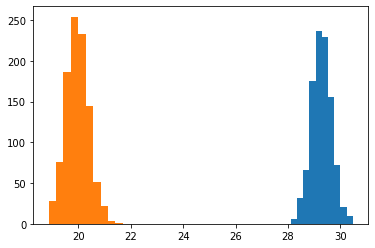

In [4]:
tmp=plt.hist(bs_stdev_4)
tmp=plt.hist(bs_stdev_6)

* plot the ecdfs of the replicates

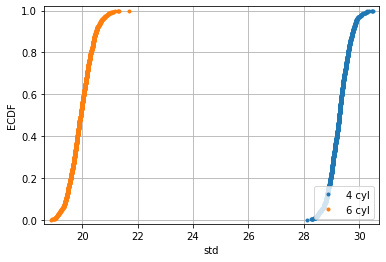

In [5]:
sx_4, sy_4 = ecdf(bs_stdev_4)
sx_6, sy_6 = ecdf(bs_stdev_6)

# Plot all ECDFs on the same plot
_ = plt.plot(sx_4, sy_4, marker = '.', linestyle = 'none')
_ = plt.plot(sx_6, sy_6, marker = '.', linestyle = 'none')

# Make nice margins
plt.margins(0.02)

# Annotate the plot
plt.legend(('4 cyl', '6 cyl'), loc='lower right')
_ = plt.xlabel('std')
_ = plt.ylabel('ECDF')

# Display the plot
plt.grid()
plt.show()

### Task 1.2

* **"Compute" the 95% confidence interval(s) which supposedly contains the true standard deviation(s).**

In [6]:
CI4cyl = np.percentile(bs_stdev_4, [0.025,0.975])
CI6cyl = np.percentile(bs_stdev_6, [0.025,0.975])

print(f'CI4cyl: {CI4cyl}\nCI6cyl: {CI6cyl}\n')
print('There is clearly a lot of strong evidence that the stdevs are VERY different !!')

CI4cyl: [28.143 28.411]
CI6cyl: [18.876 19.053]

There is clearly a lot of strong evidence that the stdevs are VERY different !!


## Task 2

1. Read chapters 3-8 in the [ThinkStats](https://greenteapress.com/wp/think-python-2e/) book in the cloud folder.
2. Work on exercises 4.1 and 4.2:

**Exercise 4.1** How much did you weigh at birth? If you don't know, call your mother or someone else who knows. Using the NSFG data (all live births),
compute the distribution of birth weights and use it to find your percentile
rank. If you were a first baby, find your percentile rank in the distribution
for first babies. Otherwise use the distribution for others. If you are in the
90th percentile or higher, call your mother back and apologize.

**Exercise 4.2** The numbers generated by random.random are supposed to be
uniform between 0 and 1; that is, every value in the range should have the
same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF.
Is the distribution uniform?

In [7]:
#I have prepared the data for you in our data folder:
import pandas as pd
import numpy as np
%precision 3

#preg=pd.read_hdf('../data/pregNSFG.h5', 'df')
preg=pd.read_csv('../data/pregNSFG.csv.gz')

#only look at live births
live = preg[preg.outcome == 1]
live.head()

,Unnamed: 0,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [8]:
# mean of weight by sex in lb
live.groupby('babysex')['totalwgt_lb'].mean()

babysex
1.0    7.411409
2.0    7.115526
Name: totalwgt_lb, dtype: float64

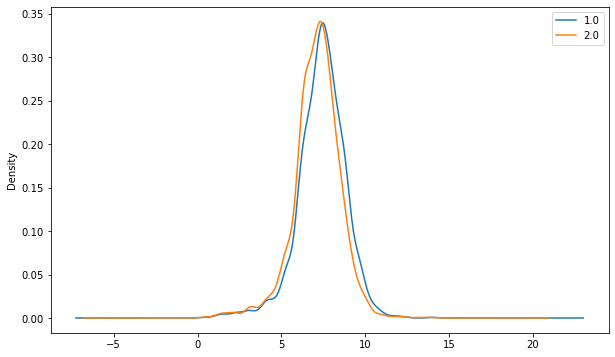

In [9]:
# distribution of weight by sex in lb
plt.figure(figsize=(10,6))
live.groupby('babysex')['totalwgt_lb'].plot(kind='density', legend=True);

### Task 2.2
* **Exercise 4.1** Assume your weight was 9 pounds:

In [10]:
import scipy.stats as st
st.percentileofscore(a=live['totalwgt_lb'], score=9)

90.747

* **Exercise 4.2** The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability. Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

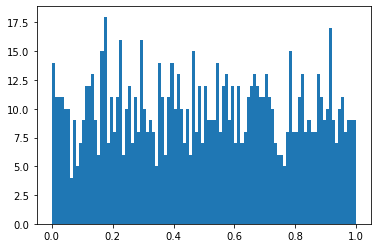

In [11]:
# play with bins and size
x = np.random.random(size=1000)
tmp=plt.hist(x, bins=100)